In [1]:
# --- CELL 1: SETUP & UPLOAD ---
!pip install -q easyocr opencv-python-headless matplotlib

import os
import easyocr
import cv2
import matplotlib.pyplot as plt
from google.colab import files
import shutil
import glob

# 1. Upload Images Again
print(">>> ACTION REQUIRED: Upload the SAME Test Images again.")
os.makedirs("drive_test_images", exist_ok=True)
uploaded = files.upload()

for filename in uploaded.keys():
    shutil.move(filename, f"drive_test_images/{filename}")

print("\n[SUCCESS] Images loaded.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 19.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 180.7/180.7 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 978.2/978.2 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 300.6/300.6 kB 12.6 MB/s eta 0:00:00
>>> ACTION REQUIRED: Upload the SAME Test Images again.


Saving IMG_5154.JPG to IMG_5154.JPG
Saving IMG_5153.JPG to IMG_5153.JPG
Saving IMG_5152.PNG to IMG_5152.PNG
Saving IMG_5151.JPG to IMG_5151.JPG

[SUCCESS] Images loaded.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.0% CompleteFilename             | EasyOCR Output
------------------------------------------------------------


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


IMG_5152.PNG         | This is 1 handwr #ten ex Wrie M$ 0$ can. awple Joo...


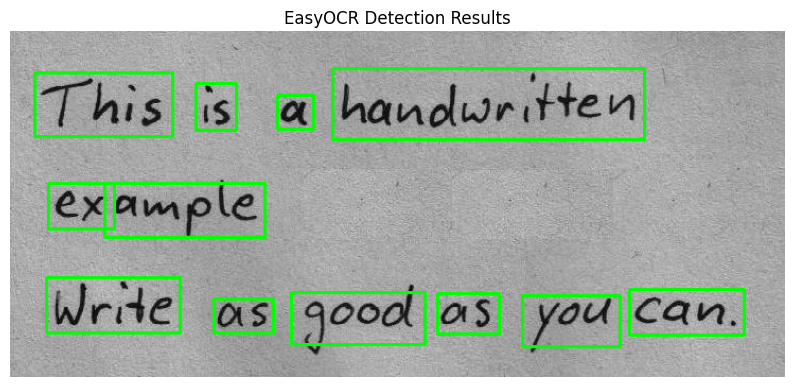

IMG_5154.JPG         | 57...


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


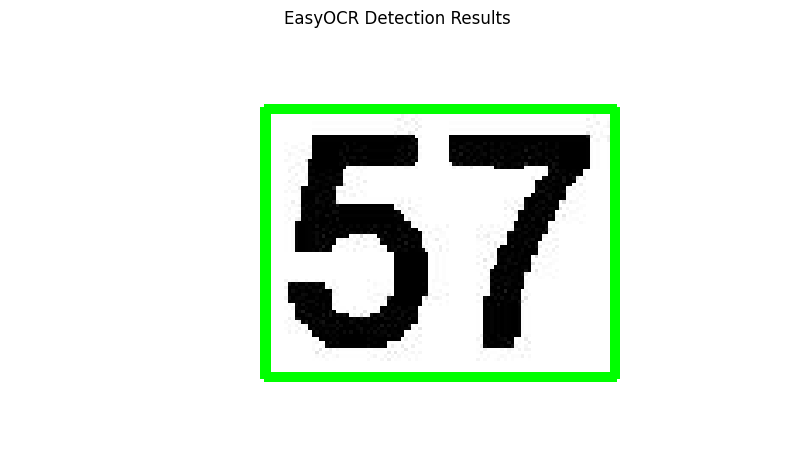

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


IMG_5151.JPG         | NO TO 38PM PM SPEED LIMIT 25 PARKING FRIDAY 1230 V...


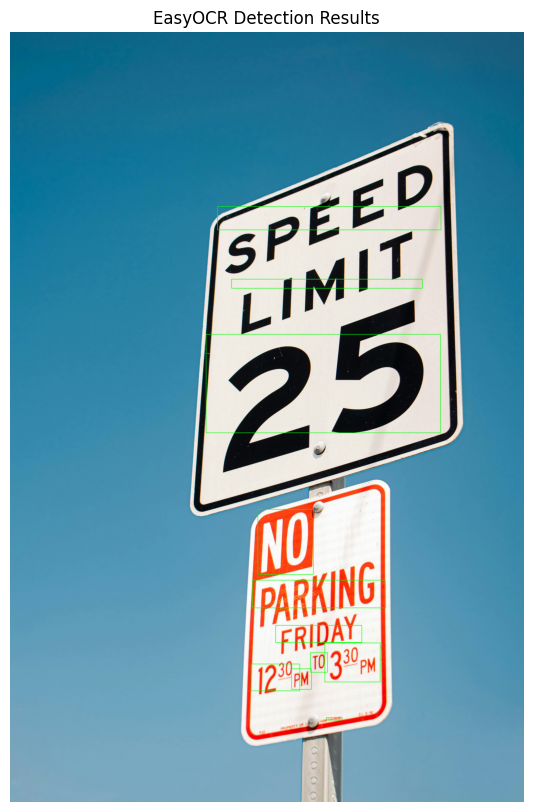

IMG_5153.JPG         | ...


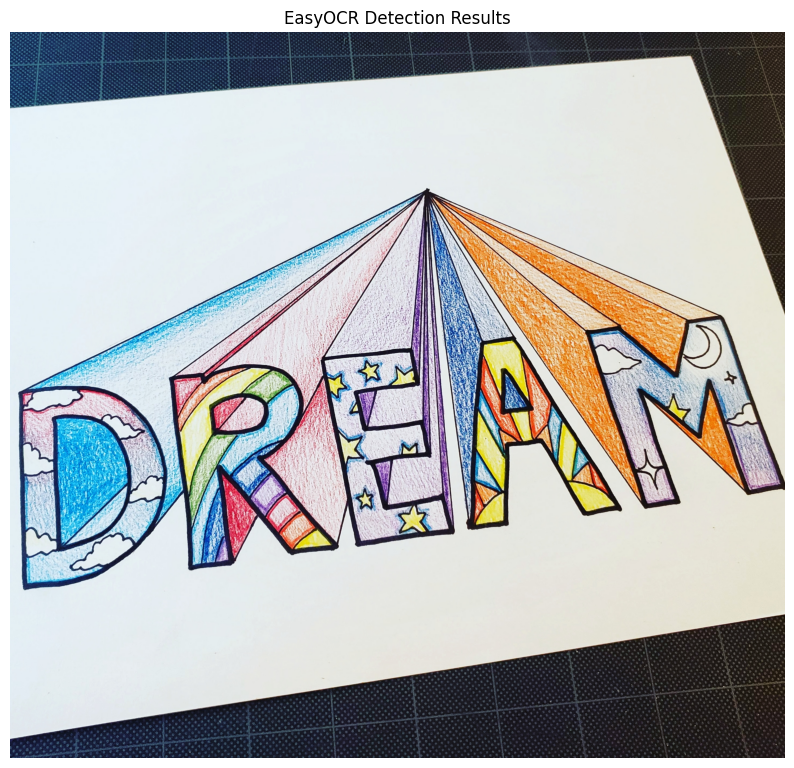

In [2]:
# --- CELL 2: EASYOCR INFERENCE ---

# Initialize the Reader (Pre-trained English Model)
# We do NOT train, as per the new instructions.
reader = easyocr.Reader(['en'], gpu=True)

def visualize_results(image_path, detections):
    """Draws bounding boxes around detected text."""
    img = cv2.imread(image_path)
    for (bbox, text, prob) in detections:
        (tl, tr, br, bl) = bbox
        tl = (int(tl[0]), int(tl[1]))
        br = (int(br[0]), int(br[1]))
        cv2.rectangle(img, tl, br, (0, 255, 0), 2)

    plt.figure(figsize=(10, 10))
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.title("EasyOCR Detection Results")
    plt.show()

# Run Loop
test_images = glob.glob("drive_test_images/*")

print(f"{'Filename':<20} | {'EasyOCR Output'}")
print("-" * 60)

for img_file in test_images:
    # 1. Read Text
    detections = reader.readtext(img_file)

    # 2. Combine text for printing
    full_text = " ".join([d[1] for d in detections])
    filename = os.path.basename(img_file)

    print(f"{filename:<20} | {full_text[:50]}...")

    # 3. Visualize (This makes your report look great)
    visualize_results(img_file, detections)